In [55]:
from keras import *

In [25]:
import tensorflow as tf

In [2]:
import numpy as np
path_root = "C:\\Users\\Charan\\Desktop\\malimg_dataset\\train"
#path_root="malimg"

In [3]:
from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=path_root,target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [4]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [5]:
imgs, labels = next(batches)

In [6]:
imgs.shape

(9339, 64, 64, 3)

In [7]:
labels.shape

(9339, 25)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

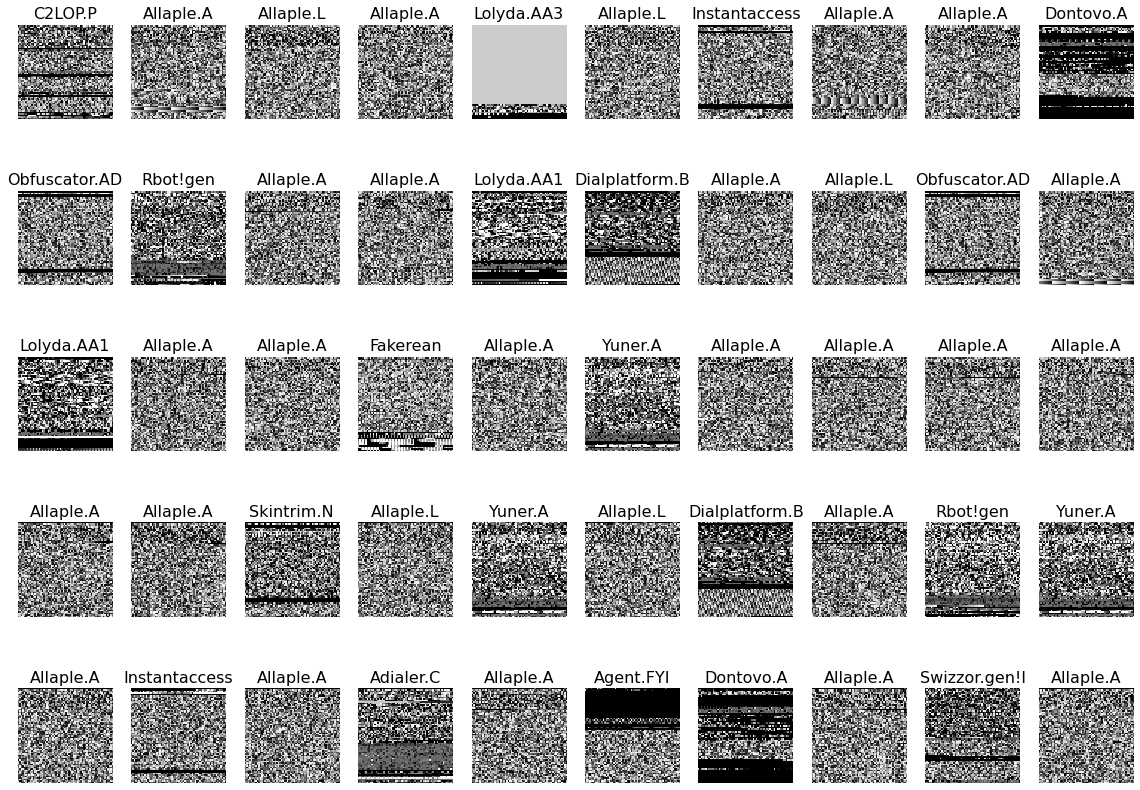

In [11]:
plots(imgs, titles = labels)

In [12]:
classes = batches.class_indices.keys()

In [13]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

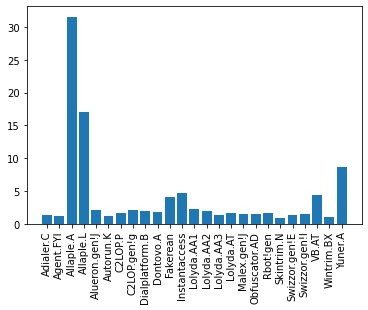

In [14]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

# Train and test

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [16]:
X_train.shape

(6537, 64, 64, 3)

In [17]:
X_test.shape

(2802, 64, 64, 3)

In [18]:
y_train.shape

(6537, 25)

In [19]:
y_test.shape

(2802, 25)

# Convolutional Neural Network Model
We will now build our CNN model using Keras. This model will have the following layers :

Convolutional Layer : 30 filters, (3 * 3) kernel size
Max Pooling Layer : (2 * 2) pool size
Convolutional Layer : 15 filters, (3 * 3) kernel size
Max Pooling Layer : (2 * 2) pool size
DropOut Layer : Dropping 25% of neurons.
Flatten Layer
Dense/Fully Connected Layer : 128 Neurons, Relu activation function
DropOut Layer : Dropping 50% of neurons.
Dense/Fully Connected Layer : 50 Neurons, Softmax activation function
Dense/Fully Connected Layer : num_class Neurons, Softmax activation function
Input shape : 64 64 3

In [20]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import *

In [21]:
num_classes = 25

In [22]:
from tensorflow.keras.regularizers import l2

In [23]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
#     Malware_model.add(Dense(num_classes, activation='softmax'))
#     Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    Malware_model.add(Dense(25, kernel_regularizer=tf.keras.regularizers.l2(0.1),activation='softmax'))
    Malware_model.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])
    return Malware_model

In [26]:
Malware_model = malware_model()

In [27]:
Malware_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 30)        840       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 15)        4065      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 15)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 15)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2940)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [28]:
y_train.shape

(6537, 25)

In [29]:
y_train_new = np.argmax(y_train, axis=1)

In [30]:
y_train_new

array([ 3,  2, 12, ..., 24,  3, 24], dtype=int64)

In [31]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train_new),
                                                 y_train_new)

C:\Users\Charan\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24], y=[ 3  2 12 ... 24  3 24] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [36]:
validation_data=class_weights

In [37]:
Malware_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
205/205 [==============================] - 20s 98ms/step - loss: 0.9884 - accuracy: 0.8363 - val_loss: 0.9851 - val_accuracy: 0.8683
Epoch 2/10
205/205 [==============================] - 20s 99ms/step - loss: 0.9855 - accuracy: 0.8564 - val_loss: 0.9842 - val_accuracy: 0.8669
Epoch 3/10
205/205 [==============================] - 20s 97ms/step - loss: 0.9854 - accuracy: 0.8594 - val_loss: 0.9833 - val_accuracy: 0.8687
Epoch 4/10
205/205 [==============================] - 20s 98ms/step - loss: 0.9836 - accuracy: 0.8730 - val_loss: 0.9805 - val_accuracy: 0.8969
Epoch 5/10
205/205 [==============================] - 20s 98ms/step - loss: 0.9825 - accuracy: 0.8802 - val_loss: 0.9798 - val_accuracy: 0.8979
Epoch 6/10
205/205 [==============================] - 19s 94ms/step - loss: 0.9818 - accuracy: 0.8860 - val_loss: 0.9799 - val_accuracy: 0.9008
Epoch 7/10
205/205 [==============================] - 19s 94ms/step - loss: 0.9818 - accuracy: 0.8856 - val_loss: 0.9782 - val_accuracy:

In [38]:
scores = Malware_model.evaluate(X_test, y_test)

88/88 [==============================] - 2s 23ms/step - loss: 0.9793 - accuracy: 0.8933


In [39]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.8932905197143555


# Confusion Matrix
Lets analyse our results.

In [41]:
y_pred = Malware_model.predict(X_test, verbose=0)

In [42]:
y_pred=np.argmax(Malware_model.predict(X_test), axis=-1)

In [43]:
y_pred

array([ 2, 21, 17, ..., 10, 14,  3], dtype=int64)

In [44]:
y_test2 = np.argmax(y_test, axis=1)

In [45]:
y_test2

array([16, 21, 17, ...,  6, 14,  3], dtype=int64)

In [46]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2, y_pred)

In [47]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

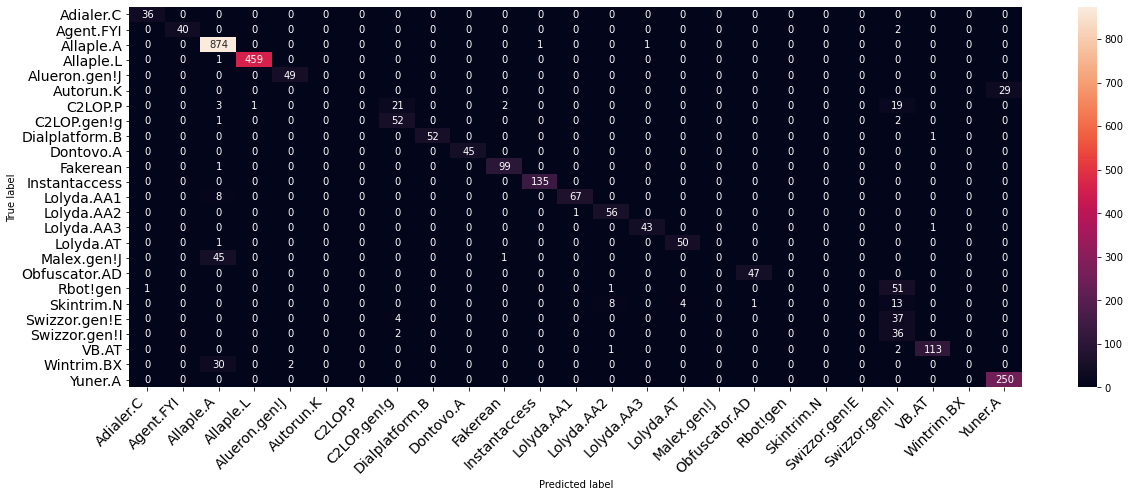

In [48]:
import pandas as pd
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)